In [2]:
from scipy.linalg import eigh  
import numpy as np
import matplotlib.pyplot as pl




In [3]:
def load_and_center_dataset(filename):
    data = np.load(filename)
    reshaped = np.reshape(data, (2000,784))
    mean = np.mean(reshaped, axis=0)
    return reshaped - mean

In [10]:
def get_covariance(dataset):
    return np.dot(np.transpose(dataset), np.conj(dataset)) / (len(dataset) - 1)def get_eig(S, m):
    evals, evects = eigh(S)
    largest_vals = np.sort(evals)[-m:]
    diag = np.diag(largest_vals[::-1])
    u = []
    for i in range(len(largest_vals)):
        index = np.where(evals == largest_vals[i])
        u.append(np.squeeze(evects[:,index], axis=1))
        

    # squeeze to remove extra dim
    return diag, np.hstack(u)

In [177]:
def get_eig(S, m):
    evals, evects = eigh(S)
    largest_vals_indices = np.argsort(evals)[::-1]
    largest_vals = evals.take(largest_vals_indices[:m])
    diag = np.diag(largest_vals)
    u = []
    for i in largest_vals_indices[:m]:
        u.append(evects[:,i])

    return diag, np.array(u).T

In [114]:
def get_eig2(S, m):
    evals, evects = eigh(S)
    largest_vals_indices = np.argsort(evals)[::-1]
    largest_vals = evals.take(largest_vals_indices[:m])
    diag = np.diag(largest_vals)
    u = []
    for i in largest_vals_indices[:m]:
        print(type(evects[:,i]))
        u.append(evects[:,i])
    #print(len(u))   

    # squeeze to remove extra dim
    return diag, np.array(u).T

In [130]:
def get_eig_perc(S, perc):
    evals, evects = eigh(S)
    largest_vals_indices = np.argsort(evals)[::-1]
    denom = sum(evals)
    largest_vals_perc = []
    u=[]
    for i in largest_vals_indices:
        if evals[i]/denom > perc:
            largest_vals_perc.append(evals[i])
            u.append(evects[:,i])
    
    diag = np.diag(largest_vals_perc)        

    return diag, np.array(u).T
    

In [235]:
#project_image(image, U) — project each image into your m-dimensional space 
#and return the new representation as a d x 1 NumPy array

def project_image(image, U):
    x = np.zeros(np.size(U,0))
    for i in range(np.size(U,1)):
        a = np.matmul(U[:,i].T, image)
        x += a * U[:,i]
    return x



In [300]:
def display_image(orig, proj):
    fig, axs = pl.subplots(1, 2, constrained_layout=True, figsize=(9, 3))
    axs[0].set_title('Original')
    axs[1].set_title('Projection')
    orig_color = axs[0].imshow(orig.reshape(28,28), aspect='equal', cmap='gray')
    prog_color = axs[1].imshow(proj.reshape(28,28), aspect='equal', cmap='gray')
    fig.colorbar(orig_color, ax=axs[0], aspect=50)
    fig.colorbar(prog_color, ax=axs[1], aspect=50)
    pl.show()
    
    
    

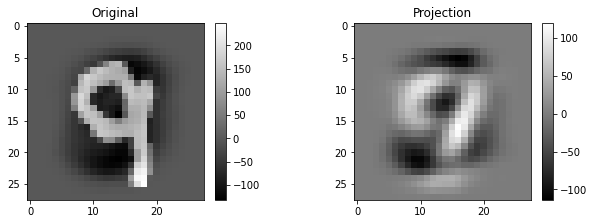

In [301]:
q = display_image(D[3], projected)

In [280]:
fig.figsize(9, 3)

AttributeError: 'Figure' object has no attribute 'figsize'

In [278]:
fig.colorbar(q, ax=axs[0])

In [256]:
axs[0].set_title('Original')
axs[1].set_title('Projection')

Text(0.5, 1.0, 'Projection')

In [272]:
q = axs[0].imshow(D[3].reshape(28,28),aspect='equal', cmap='gray')
axs[1].imshow(projected.reshape(28,28),aspect='equal', cmap='gray')

In [253]:
fig.plot(imshow(D[3].reshape(28,28)))

AttributeError: 'Figure' object has no attribute 'plot'

In [242]:
display_image(D[3], projected)

<Figure size 432x288 with 0 Axes>

In [178]:
D = load_and_center_dataset('mnist.npy')
S = get_covariance(D)
_, U = get_eig(S, 2)

In [222]:
np.matmul(a, U[:,1])

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [236]:
projected = project_image(D[3], U)

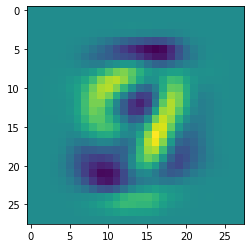

In [238]:
pl.imshow(projected.reshape(28,28))

In [193]:
g = 0
for u in U:
    g+=1
g

784

In [197]:
U[0].T @ D[3]

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 784 is different from 2)

In [201]:
np.sum(U)

12.59411516602761

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 784 is different from 2)

In [ ]:
def  display_image(orig, proj):
    pass

In [133]:
uno, dos = get_eig_perc(S,0.07)
np.sum(dos)

12.59411516602761

In [27]:
m = 784
evals, evects = eigh(S)
largest_vals = np.sort(evals)[-m:]
diag = np.diag(largest_vals[::-1])
u = []

In [50]:
for i in range(len(largest_vals)):
        index = np.where(evals == largest_vals[i])[0]
        if(len(index) > 1):
            print(i, len(index))
        u.append(evects[:,index])

53 42
54 42
55 42
56 42
57 42
58 42
59 42
60 42
61 42
62 42
63 42
64 42
65 42
66 42
67 42
68 42
69 42
70 42
71 42
72 42
73 42
74 42
75 42
76 42
77 42
78 42
79 42
80 42
81 42
82 42
83 42
84 42
85 42
86 42
87 42
88 42
89 42
90 42
91 42
92 42
93 42
94 42


In [48]:
wow = np.array(u)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


ValueError: could not broadcast input array from shape (784,1) into shape (784)

In [19]:
diag, u = get_eig(S, 2)

In [24]:
np.sum(u)

12.59411516602761

In [167]:
def test_small():
    x = load_and_center_dataset('mnist.npy')
    S = get_covariance(x)
    Lambda, U = get_eig(S, 2)

    print(np.shape(Lambda), ((2, 2)))
    print(np.all(np.isclose(
            Lambda, [[350880.76329673, 0], [0, 245632.27295307]])))

    # The eigenvectors should be the columns
    print(np.shape(U), (784, 2))
    print(np.all(np.isclose(S @ U, U @ Lambda)))

In [168]:

test_small()

[[7.01410646e+08 0.00000000e+00]
 [0.00000000e+00 4.91018914e+08]]
(2, 2) (2, 2)
False
(2, 784, 1, 1) (784, 2)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 784)